# Análisis de correlaciones del conjunto

A continuación se estudia la correlación de los atributos del conjunto con las diferentes etiquetas de clase.

### Librerías

In [1]:
import gc
from os import getcwd
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import gc

## Carga del conjunto

In [2]:
df = pd.read_csv('../Data Preprocess/preprocessed-multiclass.csv', sep=',', low_memory=False)

num_cols = df.columns[:-3]
df

,Dst Port,xhr,yhr,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Down/Up Ratio,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Seg Size Min,Active Mean,Active Std,Idle Min,Protocol_6,Protocol_17,Label
0,0,0.866025,-0.500000,112640768,3,0,0.0,0.0,0.0,0.000000,...,0.0,-1,-1,0,0.0,0.000000,56300000.0,0,0,0
1,0,0.866025,-0.500000,112641773,3,0,0.0,0.0,0.0,0.000000,...,0.0,-1,-1,0,0.0,0.000000,56300000.0,0,0,0
2,35605,0.866025,-0.500000,20784143,23,44,2416.0,240.0,64.0,105.043478,...,1.0,263,255,20,2624734.0,0.000000,9058214.0,1,0,0
3,0,0.866025,-0.500000,112640836,3,0,0.0,0.0,0.0,0.000000,...,0.0,-1,-1,0,0.0,0.000000,56300000.0,0,0,0
4,23,0.866025,-0.500000,20,1,1,0.0,0.0,0.0,0.000000,...,1.0,58856,0,20,0.0,0.000000,0.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232938,50111,0.707107,-0.707107,22,3,0,31.0,31.0,0.0,10.333333,...,0.0,64,-1,20,0.0,0.000000,0.0,1,0,0
16232939,443,0.707107,-0.707107,54682783,5,1,123.0,46.0,0.0,24.600000,...,0.0,256,180,20,158783.0,0.000000,54523813.0,1,0,0
16232940,443,0.707107,-0.707107,53682093,5,1,123.0,46.0,0.0,24.600000,...,0.0,254,180,20,259719.0,0.000000,53421756.0,1,0,0
16232941,443,0.707107,-0.707107,54683364,5,1,123.0,46.0,0.0,24.600000,...,0.0,254,180,20,158870.0,0.000000,54523593.0,1,0,0


In [3]:
df['Label'].value_counts()

0     13484708
6       686012
7       576191
2       461912
8       286191
9       193360
10      187589
11      161934
1       139890
3        41508
4        10990
5         1730
13         611
14         230
12          87
Name: Label, dtype: int64

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
num_cols = df.columns[:-3]
df[num_cols] = MinMaxScaler().fit_transform(df[num_cols])

In [7]:
import seaborn as sns

## Análisis de correlaciones

Text(0.5, 1.0, 'Correlación respecto a target')

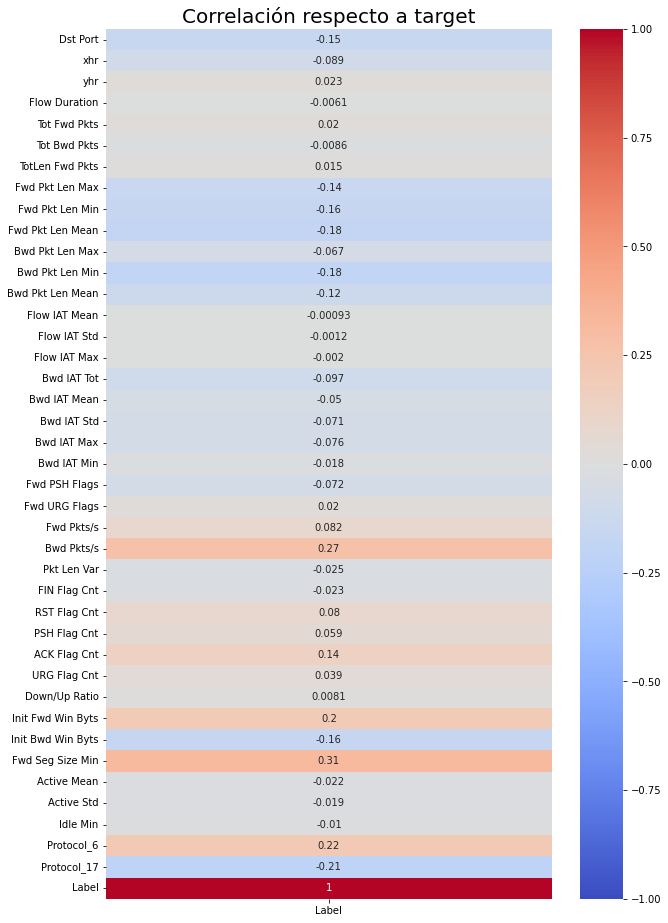

In [8]:
corr = df.corr()
# 
kot = corr
plt.figure(figsize=(10,16))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación respecto a target', fontsize=20)

0.04713728695905308


Text(0.5, 1.0, 'Correlación DoS attack')

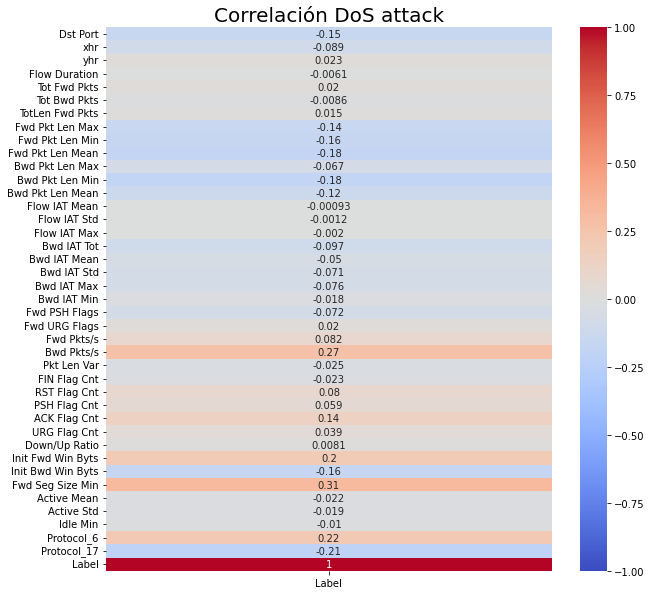

In [23]:
mask = (df['Label'] >= 0) | (df['Label'] <= 4)
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación DoS attack', fontsize=20)

0.047529692821217565


Text(0.5, 1.0, 'Correlación DDoS+PortScan attack')

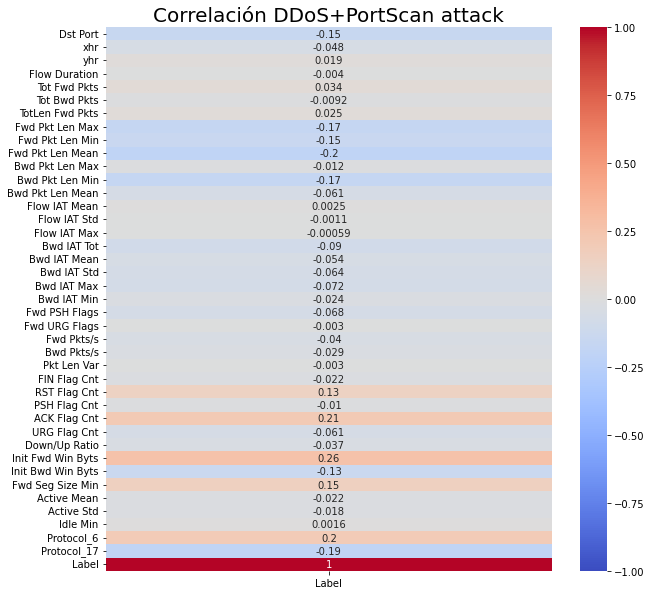

In [24]:
mask = (df['Label'] == 0) | ((df['Label'] > 4) & (df['Label'] <= 7)) 
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación DDoS+PortScan attack', fontsize=20)

0.04961014450183425


Text(0.5, 1.0, 'Correlación Botnet attack')

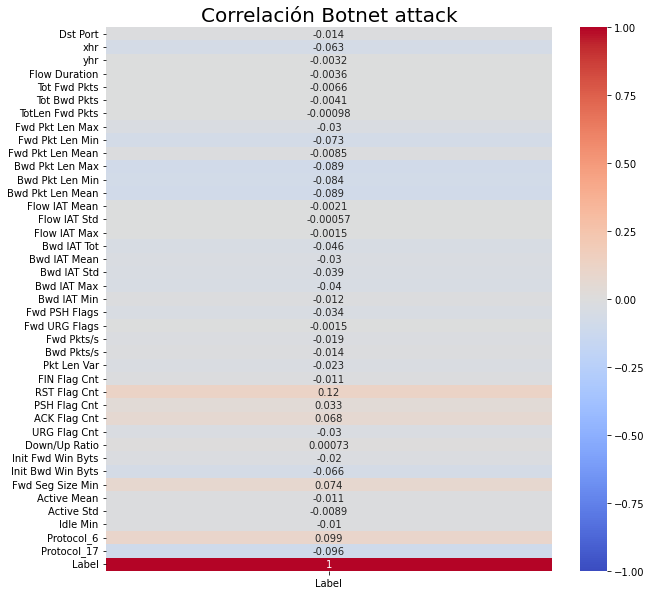

In [25]:
mask = (df['Label'] == 0) | (df['Label'] == 8)
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación Botnet attack', fontsize=20)

0.050132150080832855


Text(0.5, 1.0, 'Correlación Bruteforce attack')

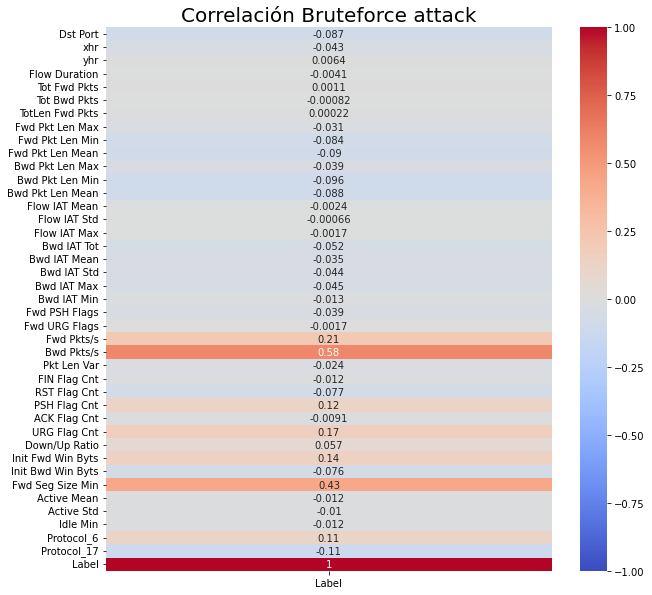

In [26]:
mask = (df['Label'] == 0) | ((df['Label'] > 8) & (df['Label'] <= 10)) 
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación Bruteforce attack', fontsize=20)

0.0503278616269935


Text(0.5, 1.0, 'Correlación Infiltration attack')

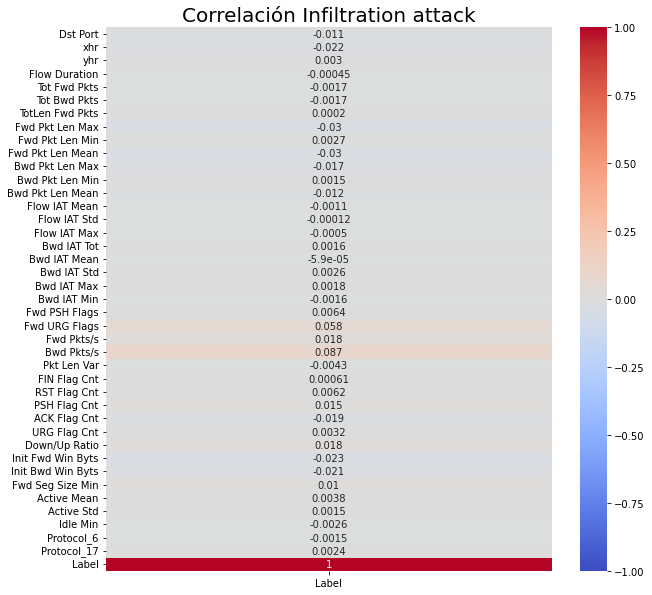

In [27]:
mask = (df['Label'] == 0) | (df['Label'] == 11)
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación Infiltration attack', fontsize=20)

0.050317566230203614


Text(0.5, 1.0, 'Correlación Web attack')

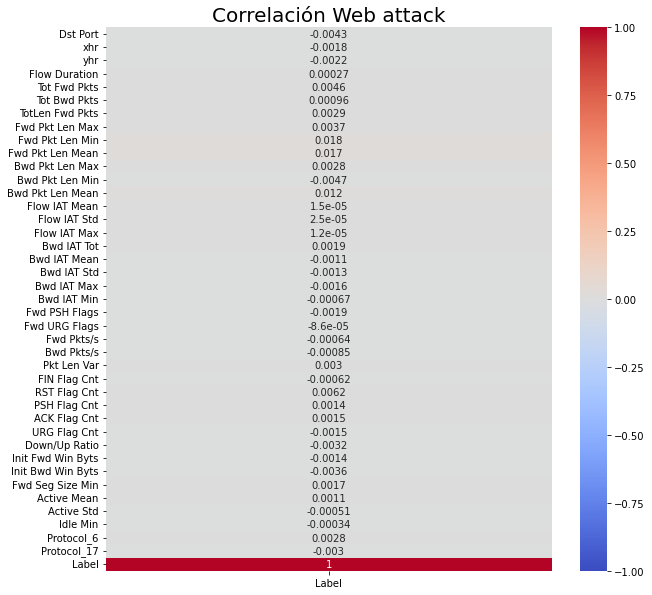

In [28]:
mask = (df['Label'] == 0) | (df['Label'] > 11)
d = df.loc[mask]
d.value_counts()
corr = d.corr()
print(np.mean(corr.to_numpy()))

kot = corr
plt.figure(figsize=(10,10))
#figure.tight_layout(pad=3.5, rect=[0, 0.03, 1, 0.95])
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación Web attack', fontsize=20)

Text(0.5, 1.0, 'Correlación respecto a target')

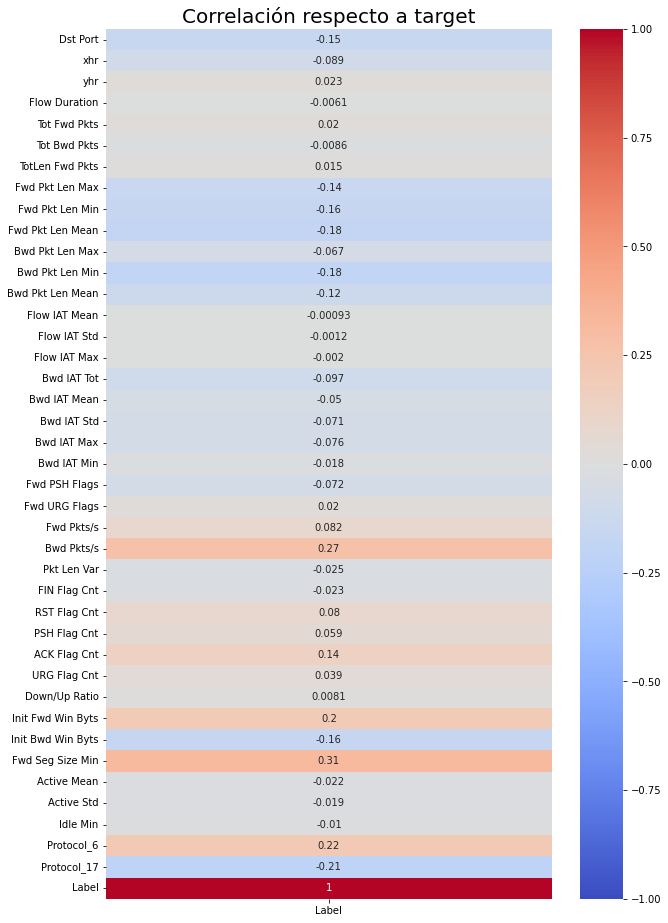

In [15]:
corr = df.corr()
# 
kot = corr
plt.figure(figsize=(10,16))
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación respecto a target', fontsize=20)

Text(0.5, 1.0, 'Correlación respecto a target')

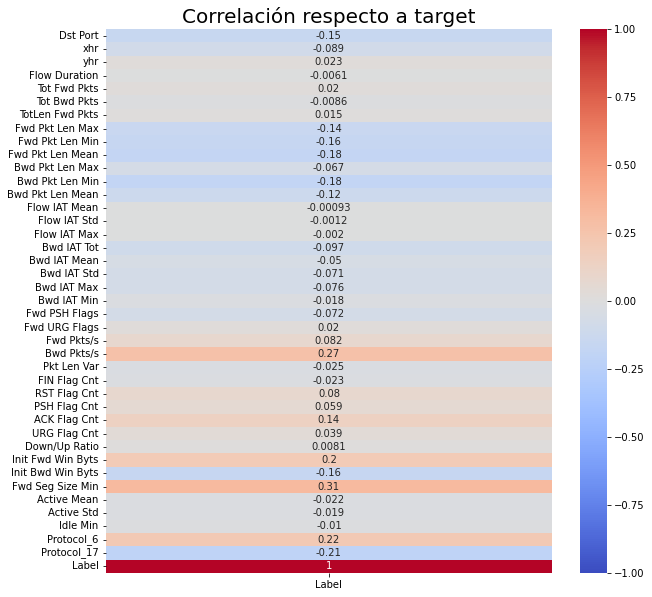

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(kot[['Label']], cmap='coolwarm', annot=True, vmin=-1).set_title('Correlación respecto a target', fontsize=20)